In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
clt_climate_df = pd.read_csv("Aqi_dataset.csv", low_memory=False)   
clt_climate_df.head()
y=clt_climate_df.AQI

In [3]:
#Dropping Dummy and AQI feature from dataset
clt_climate_df = clt_climate_df.drop(['Dummy','AQI'],axis=1)

In [4]:
#index is date
clt_climate_df['From Date'] = pd.to_datetime(clt_climate_df['From Date'])
clt_climate_df.set_index('From Date', inplace=True)
clt_climate_df.index = clt_climate_df.index.normalize()
clt_climate_df.head()

,CO,NO2,Ozone,PM10,PM2.5,SO2
From Date,,,,,,
2015-03-04,0.43,29.94,67.24,54.84,41.79,12.84
2015-04-04,6.17,54.56,23.91,112.65,71.03,21.14
2015-08-04,0.30,16.40,147.99,167.52,25.21,13.01
2015-09-04,2.03,62.37,67.27,196.20,91.29,16.76
2015-10-04,3.97,66.83,66.53,239.60,121.09,18.96


In [5]:
#Convert dataframe to ndarray
X = clt_climate_df.values
X.shape


(1539, 6)

In [6]:
#Normalization Function
def normalize(X):
    """Normalize the given dataset X
 Args:
 X: ndarray, dataset

 Returns:
 (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
 with mean 0 and standard deviation 1; mean and std are the
 mean and standard deviation respectively.

 Note:
 You will encounter dimensions where the standard deviation is
 zero, for those when you do normalization the normalized data
 will be NaN. Handle this by setting using `std = 1` for those
 dimensions when doing normalization.
 """
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1
    Xbar = (X-mu)/std_filled
    
    return Xbar, mu, std # Q4-Q6 are below


In [7]:
#Normalizing dataset
Xbar, mu, std = normalize(X)

In [8]:
#Covariance Matrix
S = np.matmul(Xbar.T, Xbar)
print('S=',S.shape)
print('X=',X.shape)
print('normalised_X=',Xbar.shape)

S= (6, 6)
X= (1539, 6)
normalised_X= (1539, 6)


In [9]:
#Function to find and sort eigen values and corresponding eigen vectors in descending order
def eig(S):
    eigvals, eigvecs = np.linalg.eig(S)
    idx = eigvals.argsort()[::-1]   
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:,idx]    
    return (eigvals,eigvecs)

In [10]:
#Function to find and sort eigen values and corresponding eigen vectors which are unsorted
def eig_unsorted(S):
    eigvals, eigvecs = np.linalg.eig(S)
    return (eigvals,eigvecs)

In [11]:
#Function to compute the projection matrix
def projection_matrix(B):
    """Compute the projection matrix onto the space spanned by `B`
    Args:
    B: ndarray of dimension (D, M), the basis for the subspace
     Returns:
    P: the projection matrix
    """
    P = np.matmul(B, B.T)
    return P 


In [12]:
#Function to compute PCA and Reconstruct the original X
def PCA(X, num_components):
    """
     Args:
     X: ndarray of size (N, D), where D is the dimension of the data,
     and N is the number of datapoints
     num_components: the number of principal components to use.
     Returns:
     X_reconstruct: ndarray of the reconstruction
     of X from the first `num_components` principal components.
     """
   
    #Xbar, mu, std = normalize(X)
    covariance = np.matmul(X.T,X)
    S = covariance
    eigvals, eigvecs = eig(S)
    #eigvals, eigvecs = eig1(S)
    sumEigen = eigvals[:num_components].sum()
    B = np.stack(eigvecs[:,:num_components])
    P = np.matmul(B,B.T)
    X_reconstruct = np.matmul(P,X.T)
    X_reconstruct = X_reconstruct.T
    return X_reconstruct,sumEigen


In [13]:
#Function to compute PCA and Reconstruct the original X
def PCA_unsorted(X, num_components):
    """
     Args:
     X: ndarray of size (N, D), where D is the dimension of the data,
     and N is the number of datapoints
     num_components: the number of principal components to use.
     Returns:
     X_reconstruct: ndarray of the reconstruction
     of X from the first `num_components` principal components.
     """
   
    #Xbar, mu, std = normalize(X)
    covariance = np.matmul(X.T,X)
    S = covariance
    eigvals, eigvecs = eig_unsorted(S)
    #eigvals, eigvecs = eig1(S)
    sumEigen = eigvals[:num_components].sum()
    B = np.stack(eigvecs[:,:num_components])
    P = np.matmul(B,B.T)
    X_reconstruct = np.matmul(P,X.T)
    X_reconstruct = X_reconstruct.T
    return X_reconstruct,sumEigen

In [14]:
#Sorted and Unsorted Eigen Values
eigvals_us,eigvecs_us= eig_unsorted(S)
eigvals,eigvecs= eig(S)
print('eigen-value for sorted',eigvals)
print('eigen-value for unsorted',eigvals_us)

eigen-value for sorted [4497.71707154 1758.90243436 1225.27113304  845.48710996  737.31073715
  169.31151396]
eigen-value for unsorted [4497.71707154 1758.90243436 1225.27113304  737.31073715  845.48710996
  169.31151396]


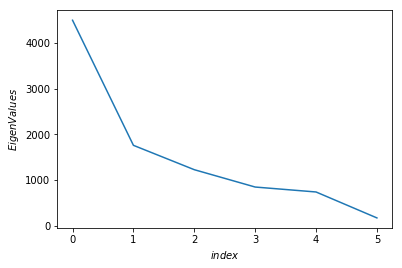

In [15]:
#Plotting Eigen values Vs Index
import matplotlib.pyplot as plt
plt.plot(eigvals)
plt.xlabel("$index$")
plt.ylabel("$EigenValues$");

In [16]:
#Function to compute MSE
def mse(predict, actual):
    """Helper function for computing the mean squared error (MSE)"""
    return np.square(predict - actual).sum(axis=1).mean()

In [17]:
#Iterate over different numbers of principal components, and compute the MSE and variance for each num_component
loss = []
reconstructions = []
sumEigenL = []
num = 7
for num_component in range(1, num):
    reconst ,sumEigen= PCA(Xbar, num_component)
    error = mse(reconst, Xbar)
    #print(error)
    reconstructions.append(reconst)
    sumEigenL.append((num_component,sumEigen))
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
#Unnormalizing the reconstructed X
reconstructions = reconstructions * std + mu
loss = np.asarray(loss)
sumEigenL = np.asarray(sumEigenL)
#print(reconstructions[4])
#print(X)
sumEigenL

array([[1.00000000e+00, 4.49771707e+03],
       [2.00000000e+00, 6.25661951e+03],
       [3.00000000e+00, 7.48189064e+03],
       [4.00000000e+00, 8.32737775e+03],
       [5.00000000e+00, 9.06468849e+03],
       [6.00000000e+00, 9.23400000e+03]])

In [18]:
#for unsorted
loss_us = []
reconstructions_us = []
sumEigenL_us = []
num = 6
for num_component in range(1, num):
    reconst_us ,sumEigen_us= PCA_unsorted(Xbar, num_component)
    error_us = mse(reconst_us, Xbar)
    #print(error_us)
    reconstructions_us.append(reconst_us)
    sumEigenL_us.append((num_component,sumEigen_us))
    loss_us.append((num_component, error_us))

reconstructions_us = np.asarray(reconstructions_us)
#Unnormalizing the reconstructed X
reconstructions_us = reconstructions_us * std + mu
loss_us = np.asarray(loss_us)
sumEigenL_us = np.asarray(sumEigenL_us)

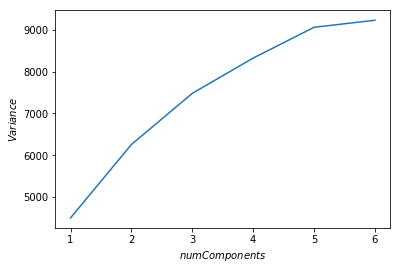

In [19]:
#Plotting the variance Vs numComponents
plt.plot(sumEigenL[:,0],sumEigenL[:,1])
plt.xlabel("$numComponents$")
plt.ylabel("$Variance$");

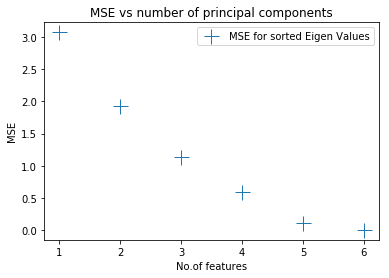

In [20]:
#Plotting MSE Vs numComponents
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1],'+',markersize=15,label = 'MSE for sorted Eigen Values');
#ax.plot(loss_us[:,0], loss_us[:,1],'o',label = 'MSE for unsorted Eigen Values');
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');
plt.xlabel("No.of features")
plt.legend()

In [21]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
rmse=[]
for i in range(6):
    x=reconstructions[i]
    index = int(0.8 * len(x[i]))
    x_train, x_test = x[:index], x[index:]
    y_train, y_test = y[:index], y[index:]
    regressor = LinearRegression()  
    regressor.fit(x_train, y_train) #training the algorithm
    y_pred = regressor.predict(x_test)
    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Root Mean Squared Error for',i+1,'features is',rmse[i])
    
print(rmse)
    

Root Mean Squared Error for 1 features is 110.183780418783
Root Mean Squared Error for 2 features is 103.72202669756929
Root Mean Squared Error for 3 features is 74.58234492515562
Root Mean Squared Error for 4 features is 70.56303499679846
Root Mean Squared Error for 5 features is 52.87089179772085
Root Mean Squared Error for 6 features is 18.026798511239683
[110.183780418783, 103.72202669756929, 74.58234492515562, 70.56303499679846, 52.87089179772085, 18.026798511239683]


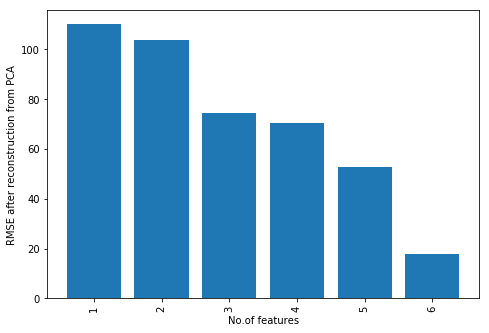

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
langs = [1,2,3,4,5,6]
#RMSE = [rmse_dt,rmse_rf,rmse_gb]
plt.xlabel("No.of features")
plt.ylabel("RMSE after reconstruction from PCA");
ax.bar(langs,rmse)
plt.show()